# Understanding Recurrent Neural Networks (RNN)
- Preparing the IMDB data

In [4]:
from keras.datasets import imdb

In [9]:
from keras.preprocessing import sequence

from keras.models import Sequential

In [6]:
max_features = 10000
maxlen = 500
batch_size = 32

In [7]:
print('Loading data....')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')


Loading data....
17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences


In [8]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


- Training the model with Embedding and SimpleRNN layers

In [12]:
from keras.layers import Dense
from keras.layers import Embedding, Flatten, Dense
from keras.layers import SimpleRNN
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 25s 151ms/step - loss: 0.6826 - acc: 0.5525 - val_loss: 0.6727 - val_acc: 0.5648
Epoch 2/10
157/157 [==============================] - 23s 148ms/step - loss: 0.4853 - acc: 0.7951 - val_loss: 0.4261 - val_acc: 0.8270
Epoch 3/10
157/157 [==============================] - 24s 151ms/step - loss: 0.3115 - acc: 0.8744 - val_loss: 0.3761 - val_acc: 0.8468
Epoch 4/10
157/157 [==============================] - 23s 148ms/step - loss: 0.2099 - acc: 0.9212 - val_loss: 0.4060 - val_acc: 0.8246
Epoch 5/10
157/157 [==============================] - 23s 148ms/step - loss: 0.1347 - acc: 0.9523 - val_loss: 0.4129 - val_acc: 0.8490
Epoch 6/10
157/157 [==============================] - 23s 149ms/step - loss: 0.0842 - acc: 0.9737 - val_loss: 0.5160 - val_acc: 0.8112
Epoch 7/10
157/157 [==============================] - 23s 149ms/step - loss: 0.0466 - acc: 0.9862 - val_loss: 0.5411 - val_acc: 0.8386
Epoch 8/10
157/157 [==============================] - 2

In [13]:
import matplotlib.pyplot as plt

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [15]:
epochs = range(1, len(acc) + 1)

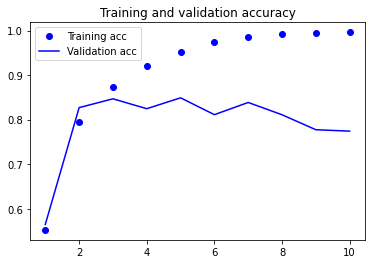

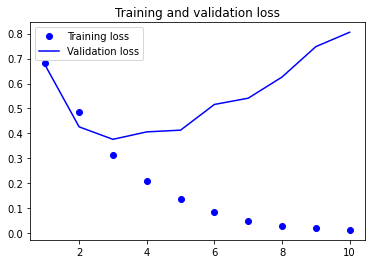

In [16]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()